This project is part of Kaggle 'House prices' competition. I will try to built model which will be predict house prices based of house parameters. <br>
Data description in details are in file 'data_description.txt' in catalogue with this file.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scikitplot.plotters import plot_learning_curve
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from ml_metrics import rmsle

In [3]:
pd.set_option('display.max_column', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Load data

In [5]:
data_frame = pd.read_csv('train.csv')


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
data_frame.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

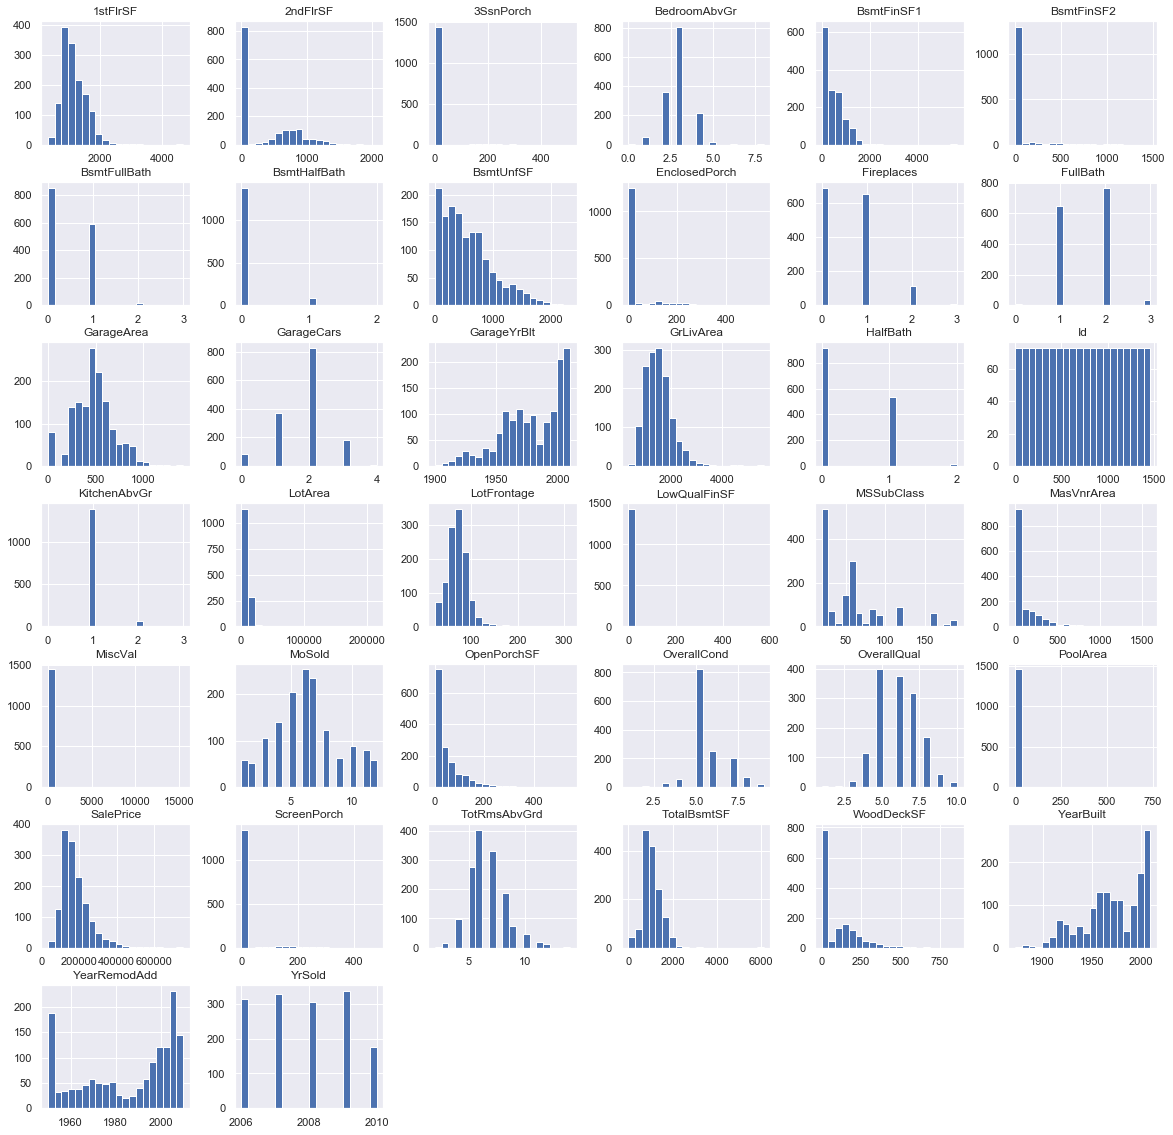

In [7]:
data_frame.hist(figsize=(20, 20), bins=20);

### Cleaning data


In [8]:
data_frame.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In PoolQC, MiscFeature, Alley, Fence most of data is missing. We can drop all these columns, but on the other hand we can try to fill these empty values. Because conform to describe data in feature as PoolQC, Fecne, FireplaceQC "NaN" means 'No pool', 'No fence' and etc. So, for record where pool or fence are available it can effect on price. Therefore I will replace Nan on NA.

In [9]:
data_frame['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [10]:
data_frame['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
data_frame['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [12]:
cleaned_data = data_frame.copy()

In [13]:
cleaned_data[['MiscFeature', 'PoolQC', 'Alley', 'Fence', 'FireplaceQu']] = data_frame[['MiscFeature', 
'PoolQC', 'Alley', 'Fence', 'FireplaceQu']].fillna('NA')

In [14]:
cleaned_data[cleaned_data['GarageYrBlt'].isnull()][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NA,NA,NA,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,123600


Where 'GarageYrBlt' equals 'NaN', there other empty 'garage' values is empty, as well. Follow descirbe data it means no garage. 

In [15]:
cleaned_data['GarageYrBlt'].fillna(0, inplace=True) #numerical features replace on number
cleaned_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = data_frame[['GarageType', 
'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NA')

In [16]:
data_frame[data_frame['BsmtExposure'].isnull()][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


The same situation as above.

In [17]:
cleaned_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = data_frame[['BsmtQual', 
'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NA')

In [18]:
cleaned_data[cleaned_data['LotFrontage'].isnull()][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NA,NA,NA,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000


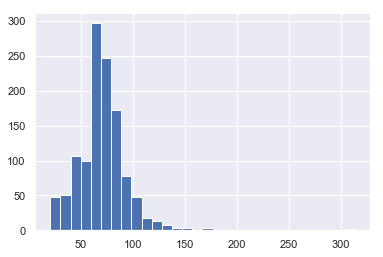

In [19]:
cleaned_data['LotFrontage'].hist(bins=30);

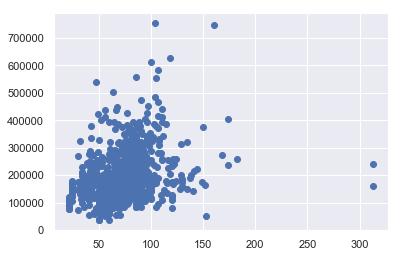

In [20]:
plt.scatter(cleaned_data['LotFrontage'], cleaned_data['SalePrice']);

For "LotFrontage" we have 259 empty records, there are too many to delete. And we can see that there are no values  equal to 0. So we can try to fill these empty values with median (because we have some outliers).

In [21]:
median = cleaned_data['LotFrontage'].median()
cleaned_data['LotFrontage'].fillna(median, inplace=True)

In [22]:
cleaned_data.dropna(inplace=True) #last few empty values we can delete

In [23]:
cleaned_data.isnull().sum().sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
               ..
ScreenPorch     0
PoolArea        0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

So, now we don't have empty values. <br>
Let's see a little bit closer to our target values 'SalePrice'.

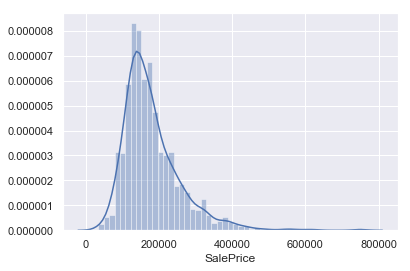

In [24]:
sns.distplot(cleaned_data['SalePrice']);

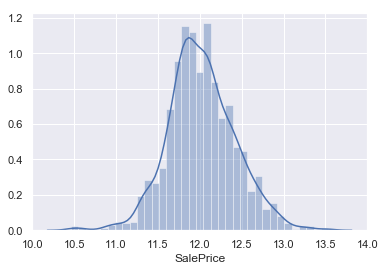

In [25]:
#log target 
sns.distplot(np.log(cleaned_data['SalePrice']));

In [26]:
cleaned_data['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
q = cleaned_data['SalePrice'].quantile(0.99)
q

439390.0

In [28]:
cleaned_data = cleaned_data[cleaned_data['SalePrice'] < q]

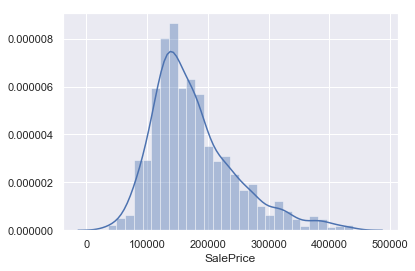

In [29]:
sns.distplot(cleaned_data['SalePrice']);

In [30]:
corr_matrix = cleaned_data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.798109
GrLivArea        0.680022
GarageCars       0.651798
GarageArea       0.628688
TotalBsmtSF      0.592061
1stFlrSF         0.583653
YearBuilt        0.557174
FullBath         0.556631
YearRemodAdd     0.535463
TotRmsAbvGrd     0.501207
Fireplaces       0.466285
MasVnrArea       0.430340
BsmtFinSF1       0.352353
WoodDeckSF       0.330706
OpenPorchSF      0.315401
LotFrontage      0.313210
2ndFlrSF         0.291316
GarageYrBlt      0.283870
HalfBath         0.276577
LotArea          0.253650
BsmtFullBath     0.235572
BsmtUnfSF        0.219595
BedroomAbvGr     0.173509
ScreenPorch      0.086517
MoSold           0.074296
3SsnPorch        0.058434
PoolArea         0.034949
BsmtFinSF2      -0.008352
MiscVal         -0.019162
BsmtHalfBath    -0.029184
YrSold          -0.032961
Id              -0.035473
LowQualFinSF    -0.060074
OverallCond     -0.074861
MSSubClass      -0.084270
EnclosedPorch   -0.127949
KitchenAbvGr    -0.146095
Name: SalePr

### Categorical data

In [224]:
target = cleaned_data['SalePrice']
log_target = np.log(cleaned_data['SalePrice'])
model_data = cleaned_data.drop(['SalePrice', 'Id'], axis=1) 

In [161]:
# Generally we have 3 feature types with rate
rates_qual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
rates_basmtype = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': -1, 'NA': 0}
rates_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': -1, 'NA': 0}

In [162]:
qual = ['GarageCond', 'GarageQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
           'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual'] #'PoolQC'
bsmt = ['BsmtFinType2', 'BsmtFinType1']
exposure = ['BsmtExposure']

In [225]:
for x in ((qual, rates_qual),  (bsmt, rates_basmtype), (exposure, rates_exposure)):
    feats, rate = x
    for feat in feats:
        model_data[feat] = model_data[feat].map(rate)

In [226]:
# Get dummies
categorical_features = list(model_data.select_dtypes(include=np.object).columns)
categorical_features.append('MSSubClass')

for feat in categorical_features:
    dummies = pd.get_dummies(model_data[feat], prefix='{0}_'.format(feat), drop_first=True)
    model_data = pd.concat([model_data, dummies], axis=1)

In [243]:
model_data.shape

(1436, 263)

### First model

In [231]:
#split dataset on train test parts and store test for final testing
train_data, test_data, train_target, test_target = train_test_split(model_data, log_target, test_size=0.2, random_state=366)

In [232]:
#separate on numerical and categorical features
numeric_features = [x for x in train_data.select_dtypes(include=np.number).columns if x != 'MSSubClass'] #in fact 'MSSubClass' is categorical feature 

X = train_data[numeric_features].values
y = train_target.values

In [170]:
def train_model(model_name, model, X, y):
    "Function checks model by cross validation."
    
    score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cross_score = np.sqrt(-score)
    print('{0}: '.format(model_name), np.mean(cross_score), cross_score)   
    

Let's try a few models.

In [171]:
models = {'RandomForest': RandomForestRegressor(),
         'ExtraTrees': ExtraTreesRegressor(),
         'XGB': XGBRegressor(),
         'SVR': SVR(),
         'KNN': KNeighborsRegressor()}

In [233]:
for model_name, model in models.items():
    train_model(model_name, model, X, y)
    print()

RandomForest:  0.14955534304043377 [0.15822354 0.15595481 0.12108184 0.17192903 0.1405875 ]

ExtraTrees:  0.14981686565193061 [0.15557944 0.15952923 0.12381263 0.16196888 0.14819416]

XGB:  0.1296551974665696 [0.13311767 0.12858181 0.10701353 0.14915606 0.13040692]

SVR:  0.38911679120196113 [0.39635601 0.40226296 0.35613848 0.41298531 0.3778412 ]

KNN:  0.22191506271511524 [0.20337316 0.22334455 0.20535677 0.2490192  0.22848164]



So, got the first result. But for most models seem like overfitted.

In [234]:
# Scale feature
X_scaled = StandardScaler().fit_transform(X)

for model_name, model in models.items():
    train_model(model_name, model, X_scaled, y)
    print()

RandomForest:  0.15277368035044195 [0.15570003 0.15736903 0.12762916 0.17861252 0.14455767]

ExtraTrees:  0.15018302379666013 [0.15429898 0.16055984 0.1363269  0.16065224 0.13907715]

XGB:  0.1296786396218239 [0.13311767 0.12851822 0.10721611 0.14914403 0.13039718]

SVR:  0.18062614759105922 [0.18877968 0.18470898 0.17588368 0.19181181 0.1619466 ]

KNN:  0.19937088504441974 [0.20309872 0.2209323  0.17980549 0.20397952 0.18903839]



### Feature engineering

Let's create some new features and check if it will improve a model.

In [235]:
model = XGBRegressor()

In [236]:
def check_new_feat(new_feat):
    "Fast add new feature and check already exist model with this feature"
    
    train_data['New'] = new_feat
    
    numeric_features = [x for x in train_data.select_dtypes(include=np.number).columns if x != 'MSSubClass']
    X = train_data[numeric_features].values
    
    train_model('XGB', model, X, y)
    
    train_data.drop('New', axis=1, inplace=True)

In [203]:
check_new_feat(train_data['GarageArea'] / train_data['GarageCars'])

XGB:  0.13351905873733477 [0.12241019 0.14037863 0.12744419 0.12132886 0.15603343]


In [177]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['FullBath'])

XGB:  0.1342130514472921 [0.12812124 0.15693318 0.12732793 0.13476012 0.12392278]


In [178]:
check_new_feat(train_data['1stFlrSF'] + train_data['2ndFlrSF'])

XGB:  0.13491994404483676 [0.13177811 0.15519574 0.12743767 0.13660935 0.12357885]


In [179]:
check_new_feat(train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'])

XGB:  0.1337486699734338 [0.12740953 0.15738361 0.12653597 0.13537094 0.12204329]


In [180]:
check_new_feat(train_data['OverallQual'] + train_data['OverallCond'])

XGB:  0.1336556337924492 [0.1258892  0.1565582  0.12783829 0.13446741 0.12352506]


In [181]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['BedroomAbvGr'])

XGB:  0.13449780070817435 [0.12661784 0.15551866 0.12842264 0.13694729 0.12498257]


In [182]:
check_new_feat(train_data['YearRemodAdd'] - train_data['YearBuilt'])

XGB:  0.13493799712575477 [0.1289274  0.15667616 0.1271776  0.13677181 0.12513703]


In [183]:
check_new_feat(train_data['BsmtUnfSF']/train_data['TotalBsmtSF'])

XGB:  0.13452214953810052 [0.12829451 0.15797567 0.12776921 0.13488222 0.12368913]


In [184]:
check_new_feat(train_data['GrLivArea']/train_data['TotRmsAbvGrd'])

XGB:  0.13451334092959358 [0.1277207  0.15637936 0.12593659 0.13537369 0.12715636]


In [185]:
check_new_feat(train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF'])

XGB:  0.13238449685163345 [0.12366999 0.1562644  0.13071914 0.13413851 0.11713044]


In [237]:
def add_new_feats(data):
    data['TotalOverall'] = data['OverallQual'] + data['OverallCond']
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['Bath_per_room'] = data['TotRmsAbvGrd'] / data['FullBath']
    data['BsmtFin'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
    
    return data

In [238]:
train_data = add_new_feats(train_data)

In [239]:
numeric_features = [x for x in train_data.select_dtypes(include=np.number).columns if x != 'MSSubClass'] 
X = train_data[numeric_features].values
train_model('XGB', model, X, y)
len(numeric_features)

XGB:  0.12913994115366972 [0.13255622 0.13276872 0.1104288  0.14548187 0.1244641 ]


235

### Optimize model 

In [189]:
parag_grid = {'n_estimators': np.arange(1, 200),
             'learning_rate': np.arange(0, 1, 0.1),
             'max_depth': np.arange(1, 20)}

random_search = RandomizedSearchCV(model, parag_grid, cv=5, scoring='neg_mean_squared_error', n_iter=100)
random_search.fit(X, y)


random_search.best_params_

{'n_estimators': 120, 'max_depth': 4, 'learning_rate': 0.2}

In [240]:
model = XGBRegressor(n_estimators=120, max_depth=4, learning_rate=0.2) 
train_model('XGB', model, X, y)

XGB:  0.12731853716866526 [0.13036759 0.12724573 0.10848141 0.14623263 0.12426533]


In [241]:
# Final fitting
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.2, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

### Check model on test data

In [244]:
test_data = add_new_feats(test_data)
test_data.shape

(288, 267)

In [245]:
X_test = test_data[numeric_features].values
y_test = test_target.values

y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.12752617106532121